# Homework 8

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from statsmodels.regression.linear_model import OLS

In [2]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [3]:
data = pd.read_csv('sadiev.aa.csv', header = None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
855,37.886100,0.351036,1.327149,1.935158,0.600909,-0.881463,0.935409,1.218600,-0.973864,0.990983,0.068175
470,29.816530,0.671328,0.855869,0.923049,0.799633,0.084856,-0.267303,1.120432,-1.246599,0.908897,0.319687
401,29.678052,-2.879242,0.017598,0.847700,0.353789,1.396391,-0.325733,-0.038427,-0.608679,-1.751924,-0.107404
802,37.276718,-0.421103,1.696705,1.776828,-2.752170,0.384150,-0.542236,-0.387136,0.193606,-1.438403,-2.828621
87,31.856526,0.179537,2.019945,0.867974,-0.567393,-0.405657,-0.185099,-0.215999,0.005006,0.064451,-2.397554


In [4]:
y = data.values.T[0]
x = data.values.T[1:]
x.shape

(10, 1000)

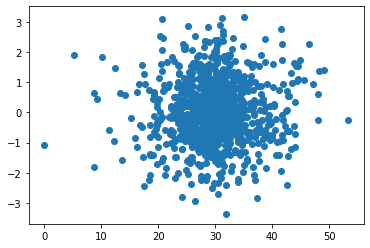

In [5]:
plt.scatter(y, x[9])
plt.show()

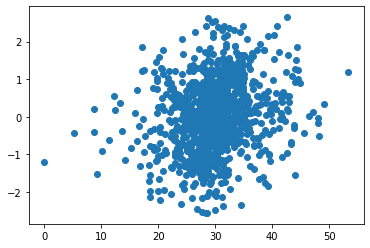

In [6]:
plt.scatter(y, x[2])
plt.show()

### Вопрос 1

Постройте линейную модель Y от X и свободного коэффициента. Проверьте, есть ли гетероскедастичность в выборке с использованием критерия Бройша-Пагана (использовать F-test, см. справку по критерию)

In [7]:
a = np.ones((y.shape[0], 1))
X = np.concatenate((a.T, x), axis=0)
X

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.30082976, -1.1980022 , -0.82144193, ..., -1.04567467,
        -1.52893396, -0.67058389],
       [ 0.44107651, -0.25921732,  0.51291127, ..., -0.86472014,
         0.48337363, -0.09017985],
       ...,
       [ 1.25692029, -0.92061964, -0.39187904, ..., -0.32251838,
        -0.40029116, -1.54393411],
       [-0.5989294 , -0.87665452, -0.07818686, ...,  0.63826503,
        -0.15202799, -1.90382584],
       [-0.19680045,  0.36826575, -0.08440776, ..., -0.62357163,
        -0.41453626,  0.59046914]])

In [8]:
model = OLS(y ,X.T).fit()
model.params

array([29.74329459,  0.88966413,  1.09680985,  1.33560133,  0.78686612,
        1.35015011,  0.06147283,  0.25801262,  0.04519685, -0.07218902,
        0.13607898])

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     22.25
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.90e-38
Time:                        19:58:03   Log-Likelihood:                -3082.7
No. Observations:                1000   AIC:                             6187.
Df Residuals:                     989   BIC:                             6241.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7433      0.169    176.014      0.000      29.412      30.075
x1             0.8897      0.165      5.390      0.000       0.566       1.214
x2             1.0968      0.169      6.474      0.000       0.764       1.429
x3             1.3356      0.176      7.577      0.000       0.990       1.682
x4             0.7869      0.167      4.700      0.000       0.458       1.115
x5             1.3502      0.175      7.694      0.000       1.006       1.695
x6             0.0615      0.163      0.377      0.706      -0.259       0.382
x7             0.2580      0.168      1.535      0.125      -0.072       0.588
x8             0.0452      0.173      0.261      0.795      -0.295       0.386
x9            -0.0722      0.163     -0.442      0.658      -0.393       0.248
x10            0.1361      0.164      0.831      0.406      -0.185       0.457
==============================================================================
Omnibus:                       73.545   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.451
Skew:                          -0.174   Prob(JB):                     2.34e-68
Kurtosis:                       5.712   Cond. No.                         1.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
if het_breuschpagan(model.resid, X.T)[3] > 0.05:
    print('Homoscedasticity')
else:
    print('Heteroscedasticity')

Homoscedasticity


In [11]:
het_breuschpagan(y, X.T)

(181.49053896497492,
 1.1488615723183635e-33,
 21.929391360899547,
 2.7976983004286945e-37)

### Вопрос 2

Оптимальное значение lambda для преобразования Бокса-Кокса на переменную Y (использовать scipy.stats)

In [12]:
l = st.boxcox(y)[1]
print('optimal value = {}'.format(l))

optimal value = 1.1618064501051077


### Вопрос 3

Постройте линейную модель Y от X и свободного коэффициента для первых 100 элементов выборки. Сколько переменных являются избыточными согласно t-критерию? Поправку на множественность гипотез проигнорировать

In [13]:
X_new = X.T[0 : 100]
y_new = y[0:100]
X_new.shape, y_new.shape

((100, 11), (100,))

In [14]:
model_new = OLS(y_new ,X_new).fit()
model_new.params

array([ 2.97622233e+01,  9.99990292e-01,  1.00000756e+00,  9.99994608e-01,
        1.00001393e+00,  1.00000654e+00, -4.62287124e-06,  7.64683955e-07,
        5.61088742e-06,  7.87451393e-06,  1.19086628e-05])

In [15]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.807e+09
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:58:14   Log-Likelihood:                 790.28
No. Observations:                 100   AIC:                            -1559.
Df Residuals:                      89   BIC:                            -1530.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7622   1.04e-05   2.87e+06      0.000      29.762      29.762
x1             1.0000   8.73e-06   1.15e+05      0.000       1.000       1.000
x2             1.0000   1.04e-05   9.65e+04      0.000       1.000       1.000
x3             1.0000   1.11e-05   8.99e+04      0.000       1.000       1.000
x4             1.0000   9.74e-06   1.03e+05      0.000       1.000       1.000
x5             1.0000   1.05e-05   9.57e+04      0.000       1.000       1.000
x6         -4.623e-06   9.47e-06     -0.488      0.627   -2.34e-05    1.42e-05
x7          7.647e-07    9.6e-06      0.080      0.937   -1.83e-05    1.98e-05
x8          5.611e-06   9.09e-06      0.617      0.539   -1.25e-05    2.37e-05
x9          7.875e-06   9.81e-06      0.803      0.424   -1.16e-05    2.74e-05
x10         1.191e-05   1.04e-05      1.146      0.255   -8.74e-06    3.26e-05
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.740
Skew:                          -0.185   Prob(JB):                        0.691
Kurtosis:                       2.798   Cond. No.                         1.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5 переменных являются избытычными.

### Вопрос 4

Имеет ли смысл данная модель согласно F-критерию?

In [37]:
model_new.f_test('const = x1 = x2 = x3 = x4 = x5 = x6 = x7 = x8 = x9 = x10 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[8.95870301e+11]]), p=0.0, df_denom=89, df_num=11>

In [18]:
p_value = model_new.f_pvalue
if p_value >= 0.05:
    print('не имеет смысл')
else: 
    print('имеет смысл')

имеет смысл


### Вопрос 5

Можно ли обнулить первые четыре переменные согласно критерию Вальда? 

In [20]:
model_new.wald_test('x1 = x2 = x3 = x4 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.19055078e+10]]), p=0.0, df_denom=89, df_num=4>

In [36]:
model_new.wald_test('x1 = x2 = x3 = x4 = 0').summary()

'<F test: F=array([[1.19055078e+10]]), p=0.0, df_denom=89, df_num=4>'

Как мы видем, нельзя обнулить первые четыре переменные.